# Overview data

In [18]:
import pandas as pd 

#Import data

df  = pd.read_excel('fraud_data.xlsx',sheet_name='fraud_data')
df

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Year,PolicyNumber,RepNumber,PolicyType,...,AccidentArea,PoliceReportFiled,WitnessPresent,AddressChange_Claim,AgeOfPolicyHolder,Sex,MaritalStatus,DriverRating,Age,FraudFound_P
0,Dec,5,Wednesday,Tuesday,Jan,1,1994,1,12,Sport - Liability,...,Urban,No,No,1 year,26 to 30,Female,Single,1,21,0
1,Jan,3,Wednesday,Monday,Jan,4,1994,2,15,Sport - Collision,...,Urban,Yes,No,no change,31 to 35,Male,Single,4,34,0
2,Oct,5,Friday,Thursday,Nov,2,1994,3,7,Sport - Collision,...,Urban,No,No,no change,41 to 50,Male,Married,3,47,0
3,Jun,2,Saturday,Friday,Jul,1,1994,4,4,Sedan - Liability,...,Rural,Yes,No,no change,51 to 65,Male,Married,2,65,0
4,Jan,5,Monday,Tuesday,Feb,2,1994,5,3,Sport - Collision,...,Urban,No,No,no change,31 to 35,Female,Single,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,Nov,4,Friday,Monday,Nov,4,1996,15415,3,Sedan - Collision,...,Urban,No,No,4 to 8 years,51 to 65,Male,Single,4,58,0
14416,Nov,5,Thursday,Friday,Dec,1,1996,15417,11,Sedan - Liability,...,Urban,No,No,no change,31 to 35,Male,Married,3,30,0
14417,Nov,5,Thursday,Friday,Dec,1,1996,15418,4,Sedan - Collision,...,Rural,No,No,no change,26 to 30,Male,Single,4,24,1
14418,Dec,1,Monday,Thursday,Dec,2,1996,15419,6,Sedan - All Perils,...,Urban,No,No,no change,31 to 35,Female,Married,4,34,0


In [19]:
# Check each column has null value or not?

df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Year                    0
PolicyNumber            0
RepNumber               0
PolicyType              0
VehicleCategory         0
BasePolicy              0
Make                    0
VehiclePrice            0
AgeOfVehicle            0
Deductible              0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
NumberOfSuppliments     0
NumberOfCars            0
AgentType               0
Fault                   0
AccidentArea            0
PoliceReportFiled       0
WitnessPresent          0
AddressChange_Claim     0
AgeOfPolicyHolder       0
Sex                     0
MaritalStatus           0
DriverRating            0
Age                     0
FraudFound_P            0
dtype: int64

In [20]:
# Check type of data in each column

df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Year                     int64
PolicyNumber             int64
RepNumber                int64
PolicyType              object
VehicleCategory         object
BasePolicy              object
Make                    object
VehiclePrice            object
AgeOfVehicle            object
Deductible               int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
NumberOfSuppliments     object
NumberOfCars            object
AgentType               object
Fault                   object
AccidentArea            object
PoliceReportFiled       object
WitnessPresent          object
AddressChange_Claim     object
AgeOfPolicyHolder       object
Sex                     object
MaritalStatus           object
DriverRating             int64
Age                      int64
FraudFou

In [21]:
# Check duplicated value in column 'No'

len(df['PolicyNumber'].unique())

14420

As you can see , value in 'PolicyNumber' column is the same as row in df , 

So it's means 'PolicyNumber' hasn't duplicated value (each row is collected from different Policyholder)

In [22]:
# show df column name 

df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Year', 'PolicyNumber', 'RepNumber', 'PolicyType',
       'VehicleCategory', 'BasePolicy', 'Make', 'VehiclePrice', 'AgeOfVehicle',
       'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars',
       'AgentType', 'Fault', 'AccidentArea', 'PoliceReportFiled',
       'WitnessPresent', 'AddressChange_Claim', 'AgeOfPolicyHolder', 'Sex',
       'MaritalStatus', 'DriverRating', 'Age', 'FraudFound_P'],
      dtype='object')

The next step , I check inconsistent value

In [23]:
df_pivot = df.pivot_table(index='PolicyType', columns='VehicleCategory', values='FraudFound_P', aggfunc='count', fill_value=0)
df_pivot

VehicleCategory,Sedan,Sport,Utility
PolicyType,,,
Sedan - All Perils,3820,0,0
Sedan - Collision,5198,0,0
Sedan - Liability,0,4694,0
Sport - All Perils,0,22,0
Sport - Collision,0,323,0
Sport - Liability,0,1,0
Utility - All Perils,0,0,317
Utility - Collision,0,0,27
Utility - Liability,0,0,18


As you can see , 

Value in PolicyType = Sedan - Liability and VehicleCategory = Sport is 4694 but 

Value in PolicyType = Sedan - Liability and VehicleCategory = Sedan is 0

It's not make sense , It should be below :

Value in PolicyType = Sedan - Liability and VehicleCategory = Sport is 0 and

Value in PolicyType = Sedan - Liability and VehicleCategory = Sedan is 4694

In [24]:
# solve inconsistent value 

df.loc[df['PolicyType'] == 'Sedan - Liability', 'VehicleCategory'] = 'Sedan'

# Check again 

df.pivot_table(index='PolicyType', columns='VehicleCategory', values='FraudFound_P', aggfunc='count', fill_value=0)

VehicleCategory,Sedan,Sport,Utility
PolicyType,,,
Sedan - All Perils,3820,0,0
Sedan - Collision,5198,0,0
Sedan - Liability,4694,0,0
Sport - All Perils,0,22,0
Sport - Collision,0,323,0
Sport - Liability,0,1,0
Utility - All Perils,0,0,317
Utility - Collision,0,0,27
Utility - Liability,0,0,18


In [25]:
df_pivot = df.pivot_table(index='Age', columns='AgeOfPolicyHolder', values='FraudFound_P', aggfunc='count', fill_value=0)
df_pivot

AgeOfPolicyHolder,16 to 17,18 to 20,21 to 25,26 to 30,31 to 35,36 to 40,41 to 50,51 to 65,over 65
Age,,,,,,,,,
0,298,0,0,0,0,0,0,0,0
16,0,7,0,0,0,0,0,0,0
17,0,5,0,0,0,0,0,0,0
18,0,0,42,0,0,0,0,0,0
19,0,0,31,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,41
77,0,0,0,0,0,0,0,0,27
78,0,0,0,0,0,0,0,0,35


As you can see , row Age = 0 has value only in column 'AgeOfPolicyHolder' = 16 to 17

and the others , I notice value in column 'AgeOfPolicyHolder' greater than 'Age'

I guess row Age = 0 which means people who are less than 16 years old and don't have a driver's license

Finallly , I decide to keep its value and note warning about this one 

In [26]:
# Check suspected columns which have relation or not?

df.pivot_table(index='PolicyType', columns='BasePolicy', values='FraudFound_P', aggfunc='count', fill_value=0)

BasePolicy,All Perils,Collision,Liability
PolicyType,,,
Sedan - All Perils,3820,0,0
Sedan - Collision,0,5198,0
Sedan - Liability,0,0,4694
Sport - All Perils,22,0,0
Sport - Collision,0,323,0
Sport - Liability,0,0,1
Utility - All Perils,317,0,0
Utility - Collision,0,27,0
Utility - Liability,0,0,18


As you can see , 'BasePolicy' and 'PolicyType' has relation each other

So the next step , I decide to remove columns which I don't use

In [27]:
column_drop = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
                 'WeekOfMonthClaimed', 'Year', 'PolicyNumber', 'RepNumber', 'PolicyType']

df = df.drop(column_drop,axis=1)
df

,VehicleCategory,BasePolicy,Make,VehiclePrice,AgeOfVehicle,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,NumberOfSuppliments,...,AccidentArea,PoliceReportFiled,WitnessPresent,AddressChange_Claim,AgeOfPolicyHolder,Sex,MaritalStatus,DriverRating,Age,FraudFound_P
0,Sport,Liability,Honda,more than 69000,3 years,300,more than 30,more than 30,none,none,...,Urban,No,No,1 year,26 to 30,Female,Single,1,21,0
1,Sport,Collision,Honda,more than 69000,6 years,400,more than 30,more than 30,none,none,...,Urban,Yes,No,no change,31 to 35,Male,Single,4,34,0
2,Sport,Collision,Honda,more than 69000,7 years,400,more than 30,more than 30,1,none,...,Urban,No,No,no change,41 to 50,Male,Married,3,47,0
3,Sedan,Liability,Toyota,20000 to 29000,more than 7,400,more than 30,more than 30,1,more than 5,...,Rural,Yes,No,no change,51 to 65,Male,Married,2,65,0
4,Sport,Collision,Honda,more than 69000,5 years,400,more than 30,more than 30,none,none,...,Urban,No,No,no change,31 to 35,Female,Single,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,Sedan,Collision,Chevrolet,30000 to 39000,7 years,400,more than 30,more than 30,none,1 to 2,...,Urban,No,No,4 to 8 years,51 to 65,Male,Single,4,58,0
14416,Sedan,Liability,Pontiac,30000 to 39000,6 years,400,more than 30,more than 30,more than 4,more than 5,...,Urban,No,No,no change,31 to 35,Male,Married,3,30,0
14417,Sedan,Collision,Toyota,20000 to 29000,5 years,400,more than 30,more than 30,more than 4,1 to 2,...,Rural,No,No,no change,26 to 30,Male,Single,4,24,1
14418,Sedan,All Perils,Toyota,20000 to 29000,2 years,400,more than 30,more than 30,none,more than 5,...,Urban,No,No,no change,31 to 35,Female,Married,4,34,0


# Create appropriate model

In [28]:
df

,VehicleCategory,BasePolicy,Make,VehiclePrice,AgeOfVehicle,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,NumberOfSuppliments,...,AccidentArea,PoliceReportFiled,WitnessPresent,AddressChange_Claim,AgeOfPolicyHolder,Sex,MaritalStatus,DriverRating,Age,FraudFound_P
0,Sport,Liability,Honda,more than 69000,3 years,300,more than 30,more than 30,none,none,...,Urban,No,No,1 year,26 to 30,Female,Single,1,21,0
1,Sport,Collision,Honda,more than 69000,6 years,400,more than 30,more than 30,none,none,...,Urban,Yes,No,no change,31 to 35,Male,Single,4,34,0
2,Sport,Collision,Honda,more than 69000,7 years,400,more than 30,more than 30,1,none,...,Urban,No,No,no change,41 to 50,Male,Married,3,47,0
3,Sedan,Liability,Toyota,20000 to 29000,more than 7,400,more than 30,more than 30,1,more than 5,...,Rural,Yes,No,no change,51 to 65,Male,Married,2,65,0
4,Sport,Collision,Honda,more than 69000,5 years,400,more than 30,more than 30,none,none,...,Urban,No,No,no change,31 to 35,Female,Single,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,Sedan,Collision,Chevrolet,30000 to 39000,7 years,400,more than 30,more than 30,none,1 to 2,...,Urban,No,No,4 to 8 years,51 to 65,Male,Single,4,58,0
14416,Sedan,Liability,Pontiac,30000 to 39000,6 years,400,more than 30,more than 30,more than 4,more than 5,...,Urban,No,No,no change,31 to 35,Male,Married,3,30,0
14417,Sedan,Collision,Toyota,20000 to 29000,5 years,400,more than 30,more than 30,more than 4,1 to 2,...,Rural,No,No,no change,26 to 30,Male,Single,4,24,1
14418,Sedan,All Perils,Toyota,20000 to 29000,2 years,400,more than 30,more than 30,none,more than 5,...,Urban,No,No,no change,31 to 35,Female,Married,4,34,0


In [29]:
df.columns

Index(['VehicleCategory', 'BasePolicy', 'Make', 'VehiclePrice', 'AgeOfVehicle',
       'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars',
       'AgentType', 'Fault', 'AccidentArea', 'PoliceReportFiled',
       'WitnessPresent', 'AddressChange_Claim', 'AgeOfPolicyHolder', 'Sex',
       'MaritalStatus', 'DriverRating', 'Age', 'FraudFound_P'],
      dtype='object')

In [30]:
X = df.drop(['FraudFound_P'],axis=1)
y = df[['FraudFound_P']]

print('X.columns : {}'.format(X.columns))
print(X.dtypes)
print('-'*40)
print('y.columns : {}'.format(y.columns))
print(y.dtypes)

X.columns : Index(['VehicleCategory', 'BasePolicy', 'Make', 'VehiclePrice', 'AgeOfVehicle',
       'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars',
       'AgentType', 'Fault', 'AccidentArea', 'PoliceReportFiled',
       'WitnessPresent', 'AddressChange_Claim', 'AgeOfPolicyHolder', 'Sex',
       'MaritalStatus', 'DriverRating', 'Age'],
      dtype='object')
VehicleCategory         object
BasePolicy              object
Make                    object
VehiclePrice            object
AgeOfVehicle            object
Deductible               int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
NumberOfSuppliments     object
NumberOfCars            object
AgentType               object
Fault                   object
AccidentArea            object
PoliceReportFiled       object
WitnessPresent          object
AddressChange_Claim     object
AgeOfPolicyHolder       object
Sex 

Before training model , you must convert categorical features to numeric by using some technique 

I choose get dummy technique to perform one-hot encoding

In [31]:
X = pd.get_dummies(X)
X

,Deductible,DriverRating,Age,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Make_Accura,...,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,300,1,21,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,400,4,34,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,400,3,47,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,400,2,65,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,400,1,27,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,400,4,58,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
14416,400,3,30,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
14417,400,4,24,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14418,400,4,34,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
a=len(y[y['FraudFound_P']==0])
b=len(y[y['FraudFound_P']==1])

print('Amount of Normal : {}'.format(a))
print('Amount of Fraud  : {}'.format(b))

print('Fraud : Normal = {:.2f} %'.format((b*100/a)))

Amount of Normal : 13597
Amount of Fraud  : 823
Fraud : Normal = 6.05 %


As you can see , My target variable trends to imbalance 

So I decide to use many techniques for handle this one such as 

1.SMOTE

2.class_weight

And there is a important thing , I choose recall value for evaluating model because 

In real world business , if fauld occurs, it will damage the company greatly.

So I think appropriate model must has maximum recall among others 

Although there are some cases that the prediction is wrong but it's a careful prediction. 

Even though the claimant may not be a fraud, it's still better than being imprudent and allow more opportunities for fraud

# Create The best model for fraud detection

In [33]:
len(X.columns) # Amount of features

94

I choose Neural network model because It's converted parameter flexibly and It's usually more accurate than normal machine learning.

As below , I decide to use Gridsearch in scikit-learn to apply for choosing the appropriate number of layers , neurons and optimizer which can maximize recall as possible

In [43]:
import numpy as np 

from tensorflow import keras

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

from keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.optimizers import SGD , Adam ,RMSprop ,Adagrad , Adadelta

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix , make_scorer, f1_score, precision_score, recall_score

from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.preprocessing import MinMaxScaler

# Define the model architecture
def create_model(num_layers, num_neurons,opt):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(len(X.columns),)))
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[keras.metrics.Recall()])
    return model

# Wrap the create_model() function inside a KerasClassifier object

clf = KerasClassifier(build_fn=create_model)

scaler = MinMaxScaler()

smote = SMOTE(random_state=0)

X_scaled = scaler.fit_transform(X)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Define the hyperparameter search space
param_grid = {'num_layers': [1, 2, 3 , 4 ,5], 
            'num_neurons': [16,32, 64, 128,256] ,
            'opt' : ['SGD','Adam','RMSprop','Adagrad','Adadelta']
            }

# Define the evaluation metric
scoring = {'f1': make_scorer(f1_score), 
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score)}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring=scoring,
                           refit='recall'
                           )

# Fit the model to the training data
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters and the corresponding F1 score, precision, and recall
print('Best Hyperparameters:', grid_search.best_params_)
print('Best F1 Score:', grid_search.best_score_)
print('Best Precision:', grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print('Best Recall:', grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

C:\Users\Panupong Jindarat\AppData\Local\Temp\ipykernel_17932\1273822008.py:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=create_model)


680/680 [==============================] - 2s 1ms/step - loss: 0.6576 - recall_44: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6679 - recall_74: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 2ms/step - loss: 0.6632 - recall_93: 0.0080


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6616 - recall_94: 0.0087


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6705 - recall_99: 3.4289e-04


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 2ms/step - loss: 0.6602 - recall_118: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6646 - recall_119: 0.0451


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6662 - recall_128: 0.2328


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6685 - recall_144: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6755 - recall_169: 0.0398


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6612 - recall_193: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6602 - recall_194: 0.0639


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6652 - recall_218: 0.2486


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6622 - recall_219: 0.0375


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6662 - recall_223: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6579 - recall_243: 0.1069


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6692 - recall_244: 0.4019


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6804 - recall_248: 0.0372


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6651 - recall_253: 0.1753


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6851 - recall_268: 0.2512


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6720 - recall_269: 0.0022


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6784 - recall_294: 0.1233


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.7070 - recall_297: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6626 - recall_304: 0.0040


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6669 - recall_318: 0.2912


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6579 - recall_319: 0.0010


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6806 - recall_323: 3.0754e-04


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6661 - recall_324: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6743 - recall_343: 0.5156


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6681 - recall_344: 0.0998


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6743 - recall_348: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6633 - recall_368: 0.0085


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6621 - recall_369: 0.0297


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6671 - recall_378: 0.1958


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6415 - recall_379: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6674 - recall_393: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6770 - recall_394: 0.0010


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6988 - recall_397: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6812 - recall_399: 6.0795e-04


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6540 - recall_403: 0.0823


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6675 - recall_418: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6480 - recall_419: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6531 - recall_428: 0.1941


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6757 - recall_443: 0.4200


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6713 - recall_444: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6673 - recall_468: 0.0055


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6684 - recall_469: 0.0129


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6776 - recall_474: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 3ms/step - loss: 0.6562 - recall_493: 0.0019


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 3ms/step - loss: 0.6593 - recall_494: 0.0039


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 3ms/step - loss: 0.6862 - recall_498: 0.0324


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 3ms/step - loss: 0.6828 - recall_499: 0.0090


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6653 - recall_503: 0.0721


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6648 - recall_504: 0.0125


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6662 - recall_518: 0.0158


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6863 - recall_519: 0.3956


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6655 - recall_523: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6744 - recall_524: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6523 - recall_528: 0.0095


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6667 - recall_543: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 1s 1ms/step - loss: 0.6787 - recall_544: 0.4851


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 1ms/step - loss: 0.6963 - recall_547: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6649 - recall_553: 0.0915


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6565 - recall_554: 0.0110


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6724 - recall_568: 0.1449


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6660 - recall_569: 0.1786


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.7048 - recall_570: 2.0802e-05


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6830 - recall_573: 0.0026


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6558 - recall_578: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6567 - recall_579: 0.0398


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6635 - recall_593: 0.0481


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6717 - recall_594: 0.0023


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6812 - recall_598: 0.0000e+00


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 2s 2ms/step - loss: 0.6868 - recall_599: 0.0054


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 3s 3ms/step - loss: 0.6670 - recall_618: 0.1682


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 3s 3ms/step - loss: 0.6738 - recall_619: 0.2264


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 3s 4ms/step - loss: 0.6881 - recall_623: 0.5047


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


680/680 [==============================] - 4s 4ms/step - loss: 0.6848 - recall_624: 9.3027e-04


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


850/850 [==============================] - 3s 2ms/step - loss: 0.4381 - recall_625: 0.8158
Best Hyperparameters: {'num_layers': 4, 'num_neurons': 64, 'opt': 'Adam'}
Best F1 Score: 0.9303998403159989
Best Precision: 0.5860055303054199
Best Recall: 0.9303998403159989


In [ ]:
# Best Hyperparameters: {'num_layers': 4, 'num_neurons': 64, 'opt': 'Adam'}
# Best F1 Score: 0.9303998403159989
# Best Precision: 0.5860055303054199
# Best Recall: 0.9303998403159989

From above , I get the best parameter in Neural network for fraud detection

The next step , I use EarlyStopping to apply my model which has best parameter for preventing overfitting problem

In [44]:
from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20) 

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(len(X.columns),)))
for i in range(4):
    model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.Recall()])

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0, callbacks=[es])

Epoch 00037: early stopping


From above , This training model process stops when Epoch = 37

In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1799602508544922
Test accuracy: 0.9738272428512573


Text(0.5, 1.0, 'Loss')

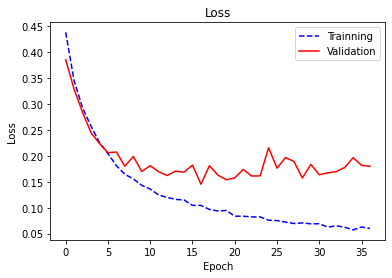

In [46]:
from matplotlib import pyplot as plt

df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')

As you can see from graph above , 

Both graphs are at a reasonable level. Because as a result of apply earlystoping

It can be seen that the model is trained to stop at epoch = 37, where the loss values ​​of the training set and validation set graphs are diverging from each other.

This means that our model predicts the training set more accurately, but less accurately predicts the validation set .

In [47]:
# Save model

filename = 'ANN.h5'
model.save(filename)
print(f"Trained ANN model saved to {filename}")

Trained ANN model saved to ANN.h5


The Next Step , I try to convert threshold for maximize recall and minimize false positive which can reduce cost to detect again after get result from my model

In [48]:
### Import and format data ###

# df  = pd.read_excel('fraud_data.xlsx',sheet_name='fraud_data')
# df.loc[df['PolicyType'] == 'Sedan - Liability', 'VehicleCategory'] = 'Sedan'

# column_drop = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
#                  'WeekOfMonthClaimed', 'Year', 'PolicyNumber', 'RepNumber', 'PolicyType']

# df = df.drop(column_drop,axis=1)

# X = df.drop(['FraudFound_P'],axis=1)
# y = df[['FraudFound_P']]

# scaler = MinMaxScaler()

# smote = SMOTE(random_state=0)

# X_scaled = scaler.fit_transform(X)

# X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

### Load model to detect fraud ###

from tensorflow.keras.models import load_model

filename = 'ANN.h5'

model_ann =  load_model(filename)

y_pred = model_ann.predict(X_test)

thresholds = [x/100 for x in range(5, 100, 5)]

for threshold in thresholds:
    y_pred_2 = np.where(y_pred > threshold , 1, 0)

    print('Threshold : {}'.format(threshold))
    print(confusion_matrix(y_test,y_pred_2))
    print(classification_report(y_test, y_pred_2))
    print('-'*40)

170/170 [==============================] - 0s 1ms/step
Threshold : 0.05
[[2413  291]
 [  22 2713]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2704
           1       0.90      0.99      0.95      2735

    accuracy                           0.94      5439
   macro avg       0.95      0.94      0.94      5439
weighted avg       0.95      0.94      0.94      5439

----------------------------------------
Threshold : 0.1
[[2443  261]
 [  32 2703]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2704
           1       0.91      0.99      0.95      2735

    accuracy                           0.95      5439
   macro avg       0.95      0.95      0.95      5439
weighted avg       0.95      0.95      0.95      5439

----------------------------------------
Threshold : 0.15
[[2462  242]
 [  45 2690]]
              precision    recall  f1-score   support

           0       0.98

# Summary :
# ANN.h5 is the best model for fraud detection